In [1]:
subreddit = input("Insira o nome subreddit: ")
print(subreddit)

Insira o nome subreddit:  brasil


brasil


In [2]:
import datetime
from datetime import timedelta

<!-- start_year = int(input("Insira o ano inicial: "))
start_month = int(input("Insira o mês inicial: "))
start_day = int(input("Insira o dia inicial: "))
start_date = datetime.date(start_year, start_month, start_day)

end_year = int(input("Insira o ano final: "))
end_month = int(input("Insira o mês final: "))
end_day = int(input("Insira o dia final: "))
end_date = datetime.date(end_year, end_month, end_day)

print (start_date)
print (end_date) -->

In [3]:
number_of_words = int(input('Insira um número de palavaras para realizar o ranking: '))
print(number_of_words)

Insira um número de palavaras para realizar o ranking:  100


100


In [4]:
import praw
import requests
import json

In [5]:
import credentials
reddit = praw.Reddit(client_id = credentials.CLIENT_ID, 
                     client_secret = credentials.CLIENT_SECRET, 
                     user_agent = credentials.USER_AGENT, 
                     redirect_uri= credentials.REDIRECT_URI) 

In [6]:
word_dictionary = {}
f = open("stopwords.txt", "r")
stop_words = list()

for word in f.read().splitlines():
    stop_words.append(word.strip())

f.close()

In [7]:
for submission in reddit.subreddit(subreddit).hot(limit=1000):
    words = submission.title.split()
    for word in words:
        if word.lower() in stop_words: 
            continue
        elif word.lower() in word_dictionary:
            word_dictionary[word.lower()] += 1
        else:
            word_dictionary[word.lower()] = 1

sorted_dict = dict(sorted(word_dictionary.items(), key=lambda item: item[1], reverse=True)[:number_of_words])
ranking = json.dumps(sorted_dict, indent=1, ensure_ascii=False)
print(sorted_dict)

SyntaxError: invalid syntax (2078654760.py, line 1)

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

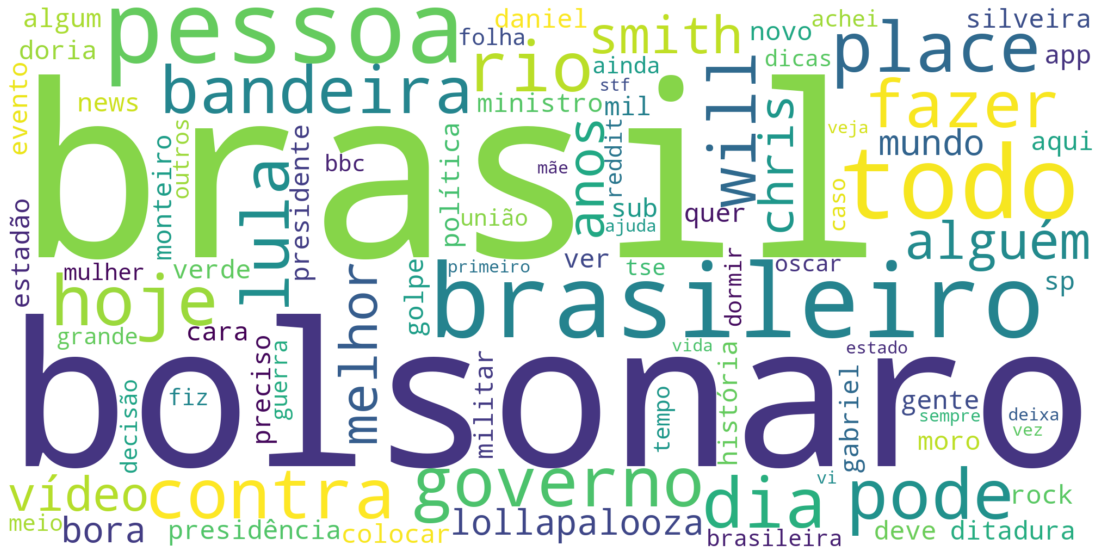

In [9]:
wc = WordCloud(background_color="white", width=2000, height=1000, repeat=False)
wc.generate(ranking)

plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()